In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import shapiro,spearmanr,binom

In [2]:
arq = "201807_CPGF.csv"

In [3]:
df = pd.read_csv(arq, encoding = "latin-1", delimiter = ";")

# Entendendo nosso dataset

In [4]:
#Exibindo as 10 primeiras linhas
df.head(10)

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,ANO EXTRATO,MÊS EXTRATO,CPF PORTADOR,NOME PORTADOR,CNPJ OU CPF FAVORECIDO,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO
0,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,2018,7,***.123.415-**,RAIMUNDO NONATO MOREIRA COSTA,1432141000146,DISTRIBUIDORA GLOBO LTDA,COMPRA A/V - R$ - APRES,19/06/2018,"99,90"
1,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,2018,7,***.818.625-**,MARIA SEILMA NEVES SOUZA,-2,NAO SE APLICA,SAQUE CASH/ATM BB,13/06/2018,"90,00"
2,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,2018,7,***.492.683-**,FERNANDO LEITE MATOS,3924361000112,SHOPPINGRAFICA LTDA,COMPRA A/V - R$ - APRES,21/06/2018,"26,59"
3,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,2018,7,***.123.415-**,RAIMUNDO NONATO MOREIRA COSTA,15596182000182,PAULO JORGE DA SILVA,COMPRA A/V - R$ - APRES,20/06/2018,"25,00"
4,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,2018,7,***.074.281-**,DANIELA SILVA BORGES DE OLIVEIRA,-2,NAO SE APLICA,SAQUE CASH/ATM BB,30/05/2018,"260,00"
5,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,2018,7,***.562.794-**,FABIO NOBRE CALIFE,7352932000142,JOAO BOSCO DA SILVA - LAVANDERIA,COMPRA A/V - R$ - APRES,01/06/2018,"100,00"
6,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,2018,7,***.562.794-**,FABIO NOBRE CALIFE,14510953000104,RIDLAV MELO SILVA 02887022474,COMPRA A/V - R$ - APRES,30/05/2018,"5,00"
7,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,2018,7,***.409.845-**,MARCOS VINICIUS BARRETO DE ARAUJO,11162436000101,MARPEL COMERCIAL DE MATERIAIS PARA ESCRITORIO ...,COMPRA A/V - R$ - APRES,15/06/2018,"125,80"
8,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,2018,7,***.449.134-**,SENISE LIRA MONTENEGRO,11062450000125,E M C XAVIER MANUTENCAO DE EXTINTORES,COMPRA A/V - R$ - APRES,22/06/2018,"120,00"
9,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,2018,7,***.716.124-**,TANIA LUCIA RAMOS CAVALCANTI DE LIMA,-2,NAO SE APLICA,SAQUE CASH/ATM BB,07/06/2018,"250,00"


Nosso dataset trata-se de transações de cartões de orgãos superiores e seus respectivos individuos com o seu valor da transação, a data da compra e o que comprou e claro tem as transações sigilosas.
O nosso dataset temos o extrato do mês de julho de 2018 (7/2018).

Vamos verificar agora quais são as variáveis e seus respectivos registros

In [5]:
df.columns

Index(['CÓDIGO ÓRGÃO SUPERIOR', 'NOME ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO',
       'NOME ÓRGÃO', 'CÓDIGO UNIDADE GESTORA', 'NOME UNIDADE GESTORA',
       'ANO EXTRATO', 'MÊS EXTRATO', 'CPF PORTADOR', 'NOME PORTADOR',
       'CNPJ OU CPF FAVORECIDO', 'NOME FAVORECIDO', 'TRANSAÇÃO',
       'DATA TRANSAÇÃO', 'VALOR TRANSAÇÃO'],
      dtype='object')

Verificando a quantidade de orgãos superiores e orgão que temos de registro

In [6]:
# Orgãos superiores
df["NOME ÓRGÃO SUPERIOR"].value_counts()

MINIST. DO PLANEJAMENTO, DESENVOLV. E GESTAO     2366
MINISTERIO DA EDUCACAO                           1902
MINISTERIO DA JUSTICA                            1277
MINISTERIO DA DEFESA                             1170
PRESIDENCIA DA REPUBLICA                          984
MINIST. DA AGRICUL.,PECUARIA E ABASTECIMENTO      765
MINISTERIO DA FAZENDA                             656
MINISTERIO DE MINAS E ENERGIA                     409
MINISTERIO DA SAUDE                               364
MINISTERIO DO TRABALHO                            286
MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES     271
MINISTERIO DA INTEGRACAO NACIONAL                 180
ADVOCACIA-GERAL DA UNIAO                          146
MINIST.DOS TRANSP.,PORTOS E AVIACAO CIVIL         116
MINISTERIO DO TRABALHO E EMPREGO                   76
MINISTERIO DAS CIDADES                             69
MINISTERIO DO MEIO AMBIENTE                        67
MINIST. DA INDUSTRIA, COM.EXTERIOR E SERVICOS      59
MINISTERIO DA CULTURA       

In [7]:
# Orgãos
df["NOME ÓRGÃO"].value_counts()

FUND.INST.BRASILEIRO DE GEOG.E ESTATISTICA                     2329
DEPARTAMENTO DE POLICIA FEDERAL                                1235
PRESIDENCIA DA REPUBLICA                                        605
COMANDO DO EXERCITO                                             585
MINISTERIO DA FAZENDA - UNIDADES COM VÍNCULO DIRETO             471
                                                               ... 
AGENCIA ESPACIAL BRASILEIRA - AEB                                 1
MINISTERIO DA CULTURA - UNIDADES COM VÍNCULO DIRETO               1
UNIVERSIDADE FEDERAL DO TRIANGULO MINEIRO                         1
SUPERINT.NACIONAL DE PREVIDENCIA COMPLEMENTAR                     1
MINISTERIO DE MINAS E ENERGIA - UNIDADES COM VÍNCULO DIRETO       1
Name: NOME ÓRGÃO, Length: 155, dtype: int64

In [8]:
# Como nosso dataset trabalha somente com dados de extrato de julho de 2018, então temos as datas de transações dividas no final
# maio e mês de junho
df["DATA TRANSAÇÃO"].value_counts().sort_values(ascending = False)

21/06/2018    614
20/06/2018    563
07/06/2018    520
06/06/2018    489
08/06/2018    477
19/06/2018    466
13/06/2018    464
30/05/2018    462
18/06/2018    458
11/06/2018    450
12/06/2018    448
15/06/2018    446
14/06/2018    437
05/06/2018    420
25/06/2018    413
04/06/2018    406
29/05/2018    373
26/06/2018    365
28/05/2018    355
01/06/2018    275
22/06/2018    271
25/05/2018     75
16/06/2018     52
09/06/2018     48
23/06/2018     38
31/05/2018     34
02/06/2018     26
17/06/2018     25
10/06/2018     17
03/06/2018     12
24/06/2018     11
27/05/2018      7
26/05/2018      3
27/06/2018      1
Name: DATA TRANSAÇÃO, dtype: int64

In [9]:
# Verificando informações das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CÓDIGO ÓRGÃO SUPERIOR   11260 non-null  int64 
 1   NOME ÓRGÃO SUPERIOR     11260 non-null  object
 2   CÓDIGO ÓRGÃO            11260 non-null  int64 
 3   NOME ÓRGÃO              11260 non-null  object
 4   CÓDIGO UNIDADE GESTORA  11260 non-null  int64 
 5   NOME UNIDADE GESTORA    11260 non-null  object
 6   ANO EXTRATO             11260 non-null  int64 
 7   MÊS EXTRATO             11260 non-null  int64 
 8   CPF PORTADOR            9521 non-null   object
 9   NOME PORTADOR           11260 non-null  object
 10  CNPJ OU CPF FAVORECIDO  11260 non-null  int64 
 11  NOME FAVORECIDO         11260 non-null  object
 12  TRANSAÇÃO               11260 non-null  object
 13  DATA TRANSAÇÃO          9521 non-null   object
 14  VALOR TRANSAÇÃO         11260 non-null  object
dtypes:

Certo vamos excluir as colunas "ANO EXTRATO E MÊS EXTRATO", pois apresentam registros como 2018 e 7 (julho) e já sabemos que estamos trabalho com o extrato de julho de 2018

In [10]:
df.drop(columns = ["ANO EXTRATO","MÊS EXTRATO"], inplace = True)

Percebemos que nossa variável "DATA TRANSAÇÃO" não está no formato de data, vamos então transformar.

In [11]:
df["DATA TRANSAÇÃO"] = pd.to_datetime(df["DATA TRANSAÇÃO"], dayfirst = True)
df["DATA TRANSAÇÃO"] = df["DATA TRANSAÇÃO"].dt.strftime("%d/%m/%Y")

In [12]:
df

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CPF PORTADOR,NOME PORTADOR,CNPJ OU CPF FAVORECIDO,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO
0,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.123.415-**,RAIMUNDO NONATO MOREIRA COSTA,1432141000146,DISTRIBUIDORA GLOBO LTDA,COMPRA A/V - R$ - APRES,19/06/2018,"99,90"
1,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.818.625-**,MARIA SEILMA NEVES SOUZA,-2,NAO SE APLICA,SAQUE CASH/ATM BB,13/06/2018,"90,00"
2,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.492.683-**,FERNANDO LEITE MATOS,3924361000112,SHOPPINGRAFICA LTDA,COMPRA A/V - R$ - APRES,21/06/2018,"26,59"
3,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.123.415-**,RAIMUNDO NONATO MOREIRA COSTA,15596182000182,PAULO JORGE DA SILVA,COMPRA A/V - R$ - APRES,20/06/2018,"25,00"
4,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.074.281-**,DANIELA SILVA BORGES DE OLIVEIRA,-2,NAO SE APLICA,SAQUE CASH/ATM BB,30/05/2018,"260,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,"80,80"
11256,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,"1383,59"
11257,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,"62,55"
11258,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,"271,49"


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CÓDIGO ÓRGÃO SUPERIOR   11260 non-null  int64 
 1   NOME ÓRGÃO SUPERIOR     11260 non-null  object
 2   CÓDIGO ÓRGÃO            11260 non-null  int64 
 3   NOME ÓRGÃO              11260 non-null  object
 4   CÓDIGO UNIDADE GESTORA  11260 non-null  int64 
 5   NOME UNIDADE GESTORA    11260 non-null  object
 6   CPF PORTADOR            9521 non-null   object
 7   NOME PORTADOR           11260 non-null  object
 8   CNPJ OU CPF FAVORECIDO  11260 non-null  int64 
 9   NOME FAVORECIDO         11260 non-null  object
 10  TRANSAÇÃO               11260 non-null  object
 11  DATA TRANSAÇÃO          9521 non-null   object
 12  VALOR TRANSAÇÃO         11260 non-null  object
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


Certo precisamos agora transformar mais uma coluna, "VALOR TRANSAÇÃO" que temos que passar para tipo númerico

In [14]:
df["VALOR TRANSAÇÃO"] = df["VALOR TRANSAÇÃO"].str.replace(",",".")

In [15]:
df["VALOR TRANSAÇÃO"] = pd.to_numeric(df["VALOR TRANSAÇÃO"])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CÓDIGO ÓRGÃO SUPERIOR   11260 non-null  int64  
 1   NOME ÓRGÃO SUPERIOR     11260 non-null  object 
 2   CÓDIGO ÓRGÃO            11260 non-null  int64  
 3   NOME ÓRGÃO              11260 non-null  object 
 4   CÓDIGO UNIDADE GESTORA  11260 non-null  int64  
 5   NOME UNIDADE GESTORA    11260 non-null  object 
 6   CPF PORTADOR            9521 non-null   object 
 7   NOME PORTADOR           11260 non-null  object 
 8   CNPJ OU CPF FAVORECIDO  11260 non-null  int64  
 9   NOME FAVORECIDO         11260 non-null  object 
 10  TRANSAÇÃO               11260 non-null  object 
 11  DATA TRANSAÇÃO          9521 non-null   object 
 12  VALOR TRANSAÇÃO         11260 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


Agora vamos verificar o que são os registros nulos nas variáveis "DATA TRANSAÇÃO E CPF PORTADOR"

In [17]:
df.isna().sum()

CÓDIGO ÓRGÃO SUPERIOR        0
NOME ÓRGÃO SUPERIOR          0
CÓDIGO ÓRGÃO                 0
NOME ÓRGÃO                   0
CÓDIGO UNIDADE GESTORA       0
NOME UNIDADE GESTORA         0
CPF PORTADOR              1739
NOME PORTADOR                0
CNPJ OU CPF FAVORECIDO       0
NOME FAVORECIDO              0
TRANSAÇÃO                    0
DATA TRANSAÇÃO            1739
VALOR TRANSAÇÃO              0
dtype: int64

In [18]:
df[df["CPF PORTADOR"].isnull()]

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CPF PORTADOR,NOME PORTADOR,CNPJ OU CPF FAVORECIDO,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO
7005,25000,MINISTERIO DA FAZENDA,25915,FUNDO CONSTITUCIONAL DO DISTRITO FEDERAL,170395,FCDF±SSP ± POLICIA CIVIL DO DF,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,800.00
7006,25000,MINISTERIO DA FAZENDA,25915,FUNDO CONSTITUCIONAL DO DISTRITO FEDERAL,170395,FCDF±SSP ± POLICIA CIVIL DO DF,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,500.00
7007,25000,MINISTERIO DA FAZENDA,25915,FUNDO CONSTITUCIONAL DO DISTRITO FEDERAL,170395,FCDF±SSP ± POLICIA CIVIL DO DF,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,800.00
7010,25000,MINISTERIO DA FAZENDA,25915,FUNDO CONSTITUCIONAL DO DISTRITO FEDERAL,170395,FCDF±SSP ± POLICIA CIVIL DO DF,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,800.00
7031,25000,MINISTERIO DA FAZENDA,25000,MINISTERIO DA FAZENDA - UNIDADES COM VÍNCULO D...,170339,COORDENACAO-GERAL DE PESQ.INVESTIGACAO DA RFB,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,1000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11254,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,137.00
11255,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,80.80
11256,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,1383.59
11257,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,NaN,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,NaN,62.55


Podemos ver que nossos valores nulos são transações sigilosas, então simples vamos preencher nosso registros ausentes na variável "CPF PORTADOR" com "Sigiloso" igual na variável "NOME PORTADOR" mesmo procedimento na variável "DATA TRANSAÇÃO" vamos colocar igual está na variável "TRANSAÇÃO", pois se trata de uma informação sigilosa.

In [19]:
condicao = df["CPF PORTADOR"].isnull()
df.loc[condicao, "CPF PORTADOR"] = "Sigiloso"

In [20]:
df[df["CPF PORTADOR"].isnull()]

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CPF PORTADOR,NOME PORTADOR,CNPJ OU CPF FAVORECIDO,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO


In [21]:
condicao2 = df["DATA TRANSAÇÃO"].isnull()
df.loc[condicao2, "DATA TRANSAÇÃO"] = "Informações protegidas por sigilo"

In [22]:
df[df["DATA TRANSAÇÃO"].isnull()]

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CPF PORTADOR,NOME PORTADOR,CNPJ OU CPF FAVORECIDO,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO


Certo valores nulos tratados

In [23]:
df

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CPF PORTADOR,NOME PORTADOR,CNPJ OU CPF FAVORECIDO,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO
0,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.123.415-**,RAIMUNDO NONATO MOREIRA COSTA,1432141000146,DISTRIBUIDORA GLOBO LTDA,COMPRA A/V - R$ - APRES,19/06/2018,99.90
1,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.818.625-**,MARIA SEILMA NEVES SOUZA,-2,NAO SE APLICA,SAQUE CASH/ATM BB,13/06/2018,90.00
2,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.492.683-**,FERNANDO LEITE MATOS,3924361000112,SHOPPINGRAFICA LTDA,COMPRA A/V - R$ - APRES,21/06/2018,26.59
3,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.123.415-**,RAIMUNDO NONATO MOREIRA COSTA,15596182000182,PAULO JORGE DA SILVA,COMPRA A/V - R$ - APRES,20/06/2018,25.00
4,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.074.281-**,DANIELA SILVA BORGES DE OLIVEIRA,-2,NAO SE APLICA,SAQUE CASH/ATM BB,30/05/2018,260.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,80.80
11256,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,1383.59
11257,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,62.55
11258,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,-11,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,271.49


Podemos perceber também que nossa variável "CNPJ OU CPF FAVORECIDO" apresenta valores "sujos", podemos deduzir que não foi preenchido corretamente, então onde temos os valores "sujos", vamos preencher com "Sem informação".

In [24]:
condicao3 = df["CNPJ OU CPF FAVORECIDO"] < 0

In [25]:
df.loc[condicao3, "CNPJ OU CPF FAVORECIDO"] = "Sem informação"

In [26]:
df

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CPF PORTADOR,NOME PORTADOR,CNPJ OU CPF FAVORECIDO,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO
0,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.123.415-**,RAIMUNDO NONATO MOREIRA COSTA,1432141000146,DISTRIBUIDORA GLOBO LTDA,COMPRA A/V - R$ - APRES,19/06/2018,99.90
1,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.818.625-**,MARIA SEILMA NEVES SOUZA,Sem informação,NAO SE APLICA,SAQUE CASH/ATM BB,13/06/2018,90.00
2,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.492.683-**,FERNANDO LEITE MATOS,3924361000112,SHOPPINGRAFICA LTDA,COMPRA A/V - R$ - APRES,21/06/2018,26.59
3,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.123.415-**,RAIMUNDO NONATO MOREIRA COSTA,15596182000182,PAULO JORGE DA SILVA,COMPRA A/V - R$ - APRES,20/06/2018,25.00
4,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.074.281-**,DANIELA SILVA BORGES DE OLIVEIRA,Sem informação,NAO SE APLICA,SAQUE CASH/ATM BB,30/05/2018,260.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,80.80
11256,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,1383.59
11257,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,62.55
11258,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,271.49


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CÓDIGO ÓRGÃO SUPERIOR   11260 non-null  int64  
 1   NOME ÓRGÃO SUPERIOR     11260 non-null  object 
 2   CÓDIGO ÓRGÃO            11260 non-null  int64  
 3   NOME ÓRGÃO              11260 non-null  object 
 4   CÓDIGO UNIDADE GESTORA  11260 non-null  int64  
 5   NOME UNIDADE GESTORA    11260 non-null  object 
 6   CPF PORTADOR            11260 non-null  object 
 7   NOME PORTADOR           11260 non-null  object 
 8   CNPJ OU CPF FAVORECIDO  11260 non-null  object 
 9   NOME FAVORECIDO         11260 non-null  object 
 10  TRANSAÇÃO               11260 non-null  object 
 11  DATA TRANSAÇÃO          11260 non-null  object 
 12  VALOR TRANSAÇÃO         11260 non-null  float64
dtypes: float64(1), int64(3), object(9)
memory usage: 1.1+ MB


Vamos analisar primeiro as transações sigilosas

In [28]:
df_sigilosa = df[df["CPF PORTADOR"] == "Sigiloso"].copy()

In [29]:
df_sigilosa

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CPF PORTADOR,NOME PORTADOR,CNPJ OU CPF FAVORECIDO,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO
7005,25000,MINISTERIO DA FAZENDA,25915,FUNDO CONSTITUCIONAL DO DISTRITO FEDERAL,170395,FCDF±SSP ± POLICIA CIVIL DO DF,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,800.00
7006,25000,MINISTERIO DA FAZENDA,25915,FUNDO CONSTITUCIONAL DO DISTRITO FEDERAL,170395,FCDF±SSP ± POLICIA CIVIL DO DF,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,500.00
7007,25000,MINISTERIO DA FAZENDA,25915,FUNDO CONSTITUCIONAL DO DISTRITO FEDERAL,170395,FCDF±SSP ± POLICIA CIVIL DO DF,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,800.00
7010,25000,MINISTERIO DA FAZENDA,25915,FUNDO CONSTITUCIONAL DO DISTRITO FEDERAL,170395,FCDF±SSP ± POLICIA CIVIL DO DF,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,800.00
7031,25000,MINISTERIO DA FAZENDA,25000,MINISTERIO DA FAZENDA - UNIDADES COM VÍNCULO D...,170339,COORDENACAO-GERAL DE PESQ.INVESTIGACAO DA RFB,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,1000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11254,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,137.00
11255,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,80.80
11256,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,1383.59
11257,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,62.55


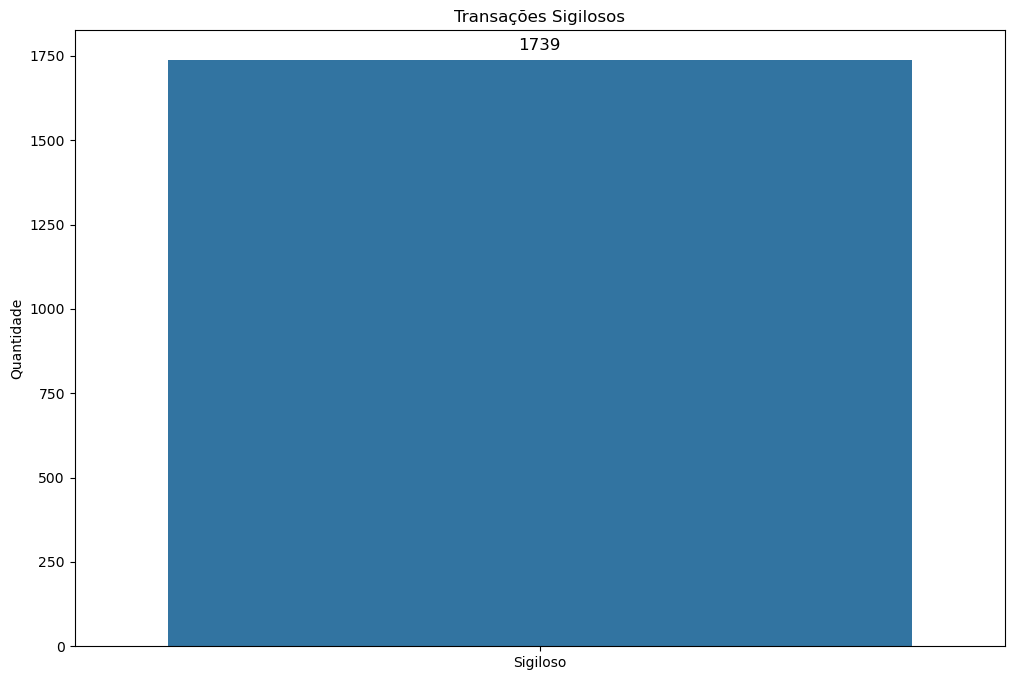

In [30]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x = "CPF PORTADOR",data = df_sigilosa)
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Quantidade")
plt.title("Transações Sigilosos")
plt.show()

In [31]:
# Valor gasto pela transações sigilosas
df_sigilosa["VALOR TRANSAÇÃO"].sum()

1749347.32

In [32]:
df_sigilosa.describe()

,CÓDIGO ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,CÓDIGO UNIDADE GESTORA,VALOR TRANSAÇÃO
count,1739.000000,1739.000000,1739.000000,1739.000000
mean,26661.874641,26769.101783,170335.658999,1005.950155
std,4703.350805,4706.253944,42402.947496,2169.639496
min,20000.000000,20101.000000,110001.000000,4.200000
25%,20000.000000,20101.000000,110538.000000,333.180000
50%,30000.000000,30108.000000,200344.000000,1000.000000
75%,30000.000000,30108.000000,200372.000000,1000.000000
max,30000.000000,30108.000000,200406.000000,30591.000000


In [33]:
df_sigilosa1 = df_sigilosa.groupby("NOME ÓRGÃO SUPERIOR")["VALOR TRANSAÇÃO"].agg(["count","sum"]).reset_index().sort_values(by = "sum", ascending = False)

In [34]:
df_sigilosa1.rename(columns = {"count":"Transações", "sum":"Valor Total"},inplace=True)

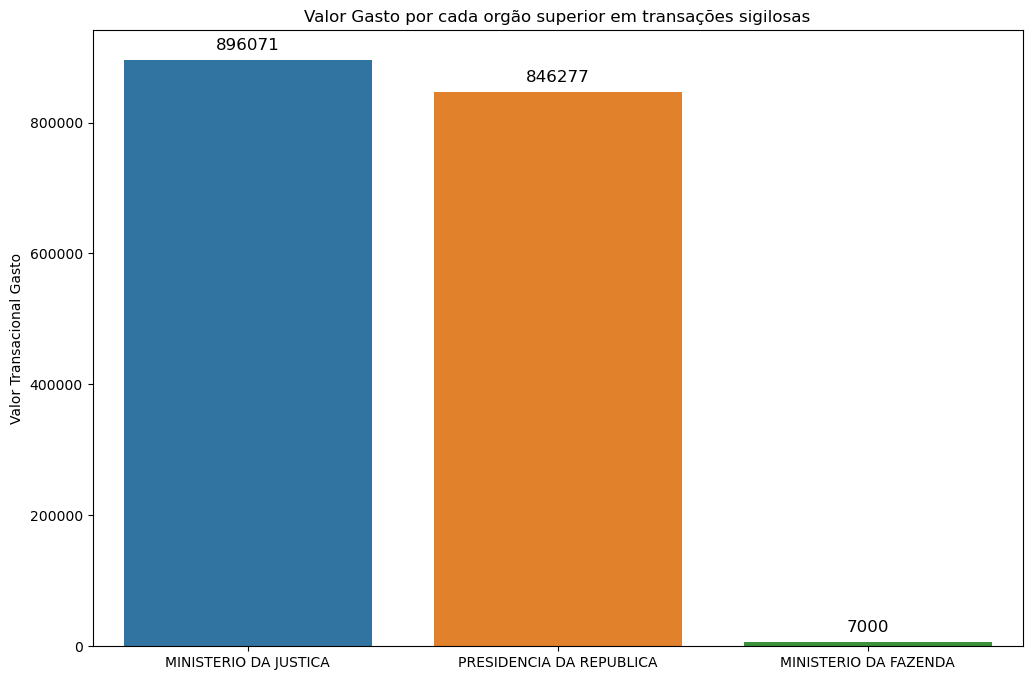

In [35]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df_sigilosa1["NOME ÓRGÃO SUPERIOR"], y = df_sigilosa1["Valor Total"])
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Valor Transacional Gasto")
plt.title("Valor Gasto por cada orgão superior em transações sigilosas")
plt.show()

In [36]:
df_sigilosa1

,NOME ÓRGÃO SUPERIOR,Transações,Valor Total
1,MINISTERIO DA JUSTICA,1154,896070.59
2,PRESIDENCIA DA REPUBLICA,576,846276.73
0,MINISTERIO DA FAZENDA,9,7000.00


In [37]:
df_sigilosa2 = df_sigilosa.groupby(["NOME ÓRGÃO SUPERIOR","NOME ÓRGÃO"])["VALOR TRANSAÇÃO"].agg(["count","sum"]).reset_index().sort_values(by = "sum", ascending = False)

In [38]:
df_sigilosa2.rename(columns = {"count":"Transações", "sum":"Valor Total"})

,NOME ÓRGÃO SUPERIOR,NOME ÓRGÃO,Transações,Valor Total
2,MINISTERIO DA JUSTICA,DEPARTAMENTO DE POLICIA FEDERAL,1154,896070.59
3,PRESIDENCIA DA REPUBLICA,PRESIDENCIA DA REPUBLICA,576,846276.73
1,MINISTERIO DA FAZENDA,MINISTERIO DA FAZENDA - UNIDADES COM VÍNCULO D...,5,4100.00
0,MINISTERIO DA FAZENDA,FUNDO CONSTITUCIONAL DO DISTRITO FEDERAL,4,2900.00


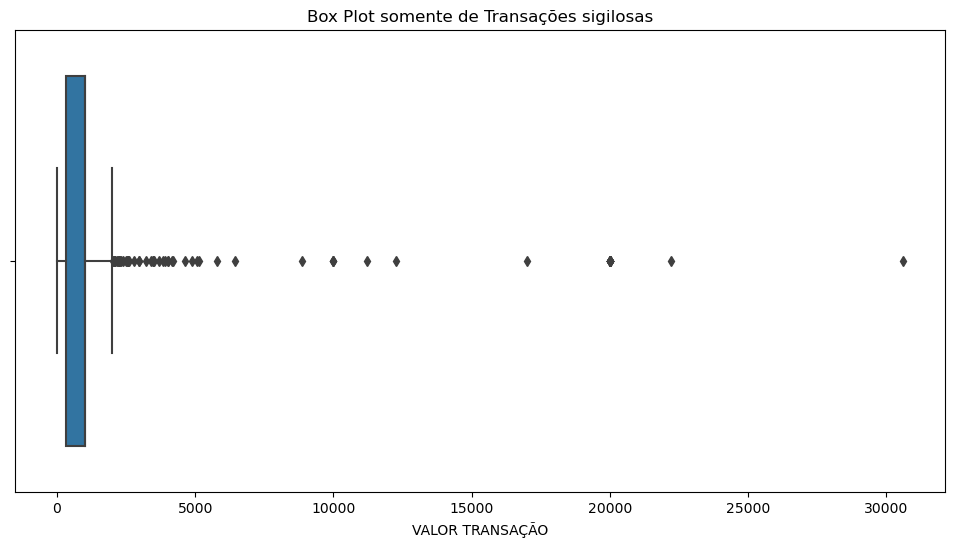

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_sigilosa["VALOR TRANSAÇÃO"])
plt.title("Box Plot somente de Transações sigilosas")
plt.show()

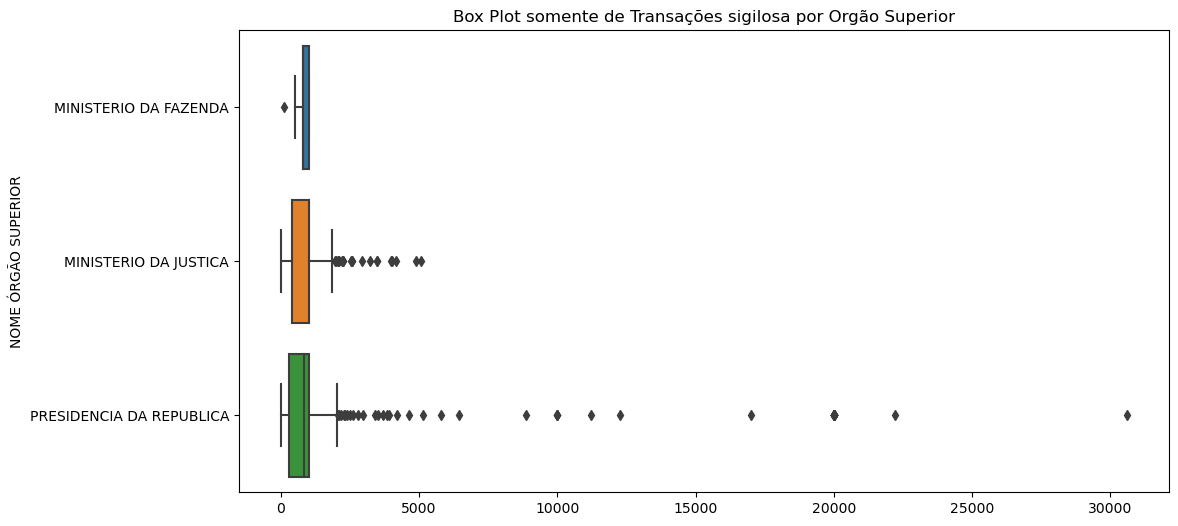

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(x=df_sigilosa["VALOR TRANSAÇÃO"], y = df_sigilosa["NOME ÓRGÃO SUPERIOR"])
plt.xlabel("")
plt.title("Box Plot somente de Transações sigilosa por Orgão Superior")
plt.show()

In [41]:
IC = df_sigilosa["VALOR TRANSAÇÃO"].quantile(0.75) - df_sigilosa["VALOR TRANSAÇÃO"].quantile(0.25)
formula = df_sigilosa["VALOR TRANSAÇÃO"].quantile(0.75) + (1.5 * IC)

In [42]:
condicao = df_sigilosa["VALOR TRANSAÇÃO"] > formula

In [43]:
df_sigilosa3 = df_sigilosa.loc[condicao, ].copy()

In [44]:
df_sigilosa3.describe()

,CÓDIGO ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,CÓDIGO UNIDADE GESTORA,VALOR TRANSAÇÃO
count,63.000000,63.000000,63.000000,63.000000
mean,22857.142857,22960.142857,135973.158730,8870.547619
std,4553.825555,4557.013233,41053.693775,7908.950181
min,20000.000000,20101.000000,110001.000000,2025.000000
25%,20000.000000,20101.000000,110001.000000,2583.740000
50%,20000.000000,20101.000000,110538.000000,4166.000000
75%,30000.000000,30108.000000,200354.000000,20000.000000
max,30000.000000,30108.000000,200384.000000,30591.000000


In [45]:
maior_transacao = df_sigilosa3["VALOR TRANSAÇÃO"] == df_sigilosa3["VALOR TRANSAÇÃO"].max()
df_sigilosa3.loc[maior_transacao, :]

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CPF PORTADOR,NOME PORTADOR,CNPJ OU CPF FAVORECIDO,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO
11027,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,30591.0


In [46]:
df_sigilosa4 = df_sigilosa.groupby("NOME ÓRGÃO SUPERIOR")["VALOR TRANSAÇÃO"].agg(["count","mean","median"]).reset_index().sort_values(by = "mean", ascending = False)

In [47]:
df_sigilosa4.rename(columns = {"count":"Transações","mean":"Média de Transação","median":"Mediana"})

,NOME ÓRGÃO SUPERIOR,Transações,Média de Transação,Mediana
2,PRESIDENCIA DA REPUBLICA,576,1469.230434,831.07
0,MINISTERIO DA FAZENDA,9,777.777778,800.00
1,MINISTERIO DA JUSTICA,1154,776.490979,1000.00


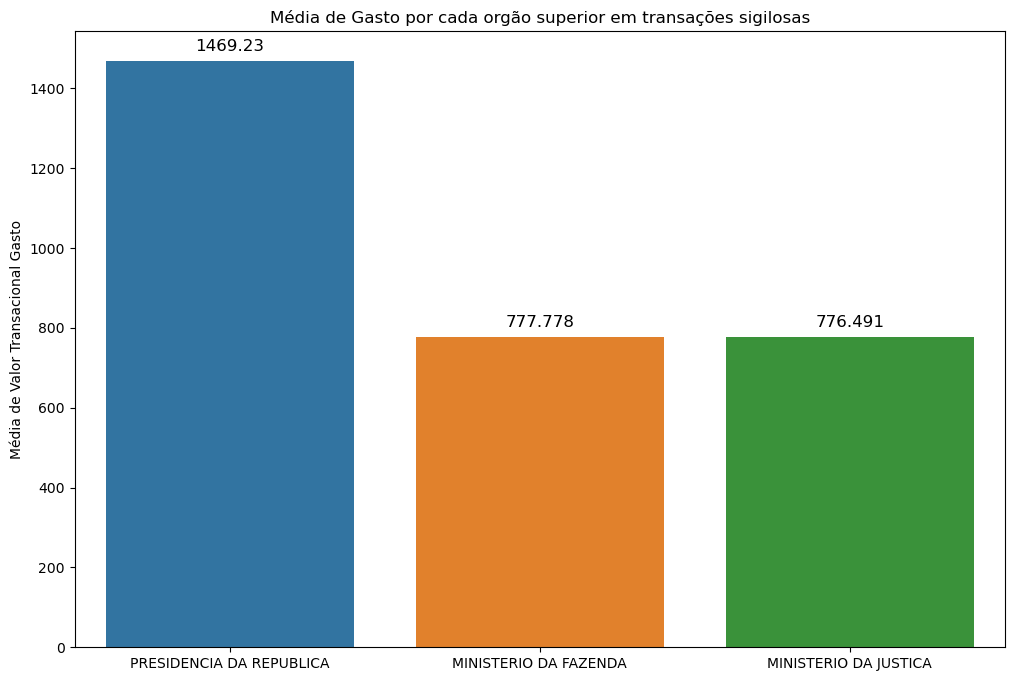

In [48]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df_sigilosa4["NOME ÓRGÃO SUPERIOR"], y = df_sigilosa4["mean"], label = "")
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Média de Valor Transacional Gasto")
plt.title("Média de Gasto por cada orgão superior em transações sigilosas")
plt.show()

Vamos fazer um teste de hipotese para descobrir se nossa média amostral de transação do orgão Presidencia da Republica com transações sigilosas é igual a média populacional de transação de toda a população do orgão Presidencia da Republica.

H0 = Nossa média de transações sigilosas do orgão Presidencia da Republica é igual a média transacional de todo o orgão Presidencia da Republica
H1 = Nossa média de transações sigilosas do orgão Presidencia da Republica é diferente da média transacional de todo o orgão Presidencia da Republica

In [49]:
media_populacional = df["VALOR TRANSAÇÃO"][df["NOME ÓRGÃO SUPERIOR"] == "PRESIDENCIA DA REPUBLICA"].mean()
nivel_significancia = 0.05

In [50]:
estatistica_t, p_valor = stats.ttest_1samp(
    a=df_sigilosa["VALOR TRANSAÇÃO"][df_sigilosa["NOME ÓRGÃO SUPERIOR"] == "PRESIDENCIA DA REPUBLICA"],
    popmean=media_populacional
)

In [51]:
if p_valor > nivel_significancia:
    print("Não temos evidencias suficientes para rejeitar a Hipotese nula que indica que as médias são iguais")
else:
    print("Rejeitamos a Hipotese nula e aceitamos estatisticamente a Hipotes alternativa que nossa médias são diferentes")

Rejeitamos a Hipotese nula e aceitamos estatisticamente a Hipotes alternativa que nossa médias são diferentes


In [52]:
if estatistica_t > 0:
    print("Nossa média amostral é maior que nossa média populacional")
else:
    print("Nossa média amostral é menor que nossa média populacional")

Nossa média amostral é maior que nossa média populacional


Então chegamos a um ponto que podemos garantir tanto visualmente como estatisticamente que média de transações amostral do orgão Presidencia da Republica com informações sigilosas é maior do que a média de transações populacional de todas as transações do orgão Presidencia da Republica.

In [53]:
df

,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO,NOME ÓRGÃO,CÓDIGO UNIDADE GESTORA,NOME UNIDADE GESTORA,CPF PORTADOR,NOME PORTADOR,CNPJ OU CPF FAVORECIDO,NOME FAVORECIDO,TRANSAÇÃO,DATA TRANSAÇÃO,VALOR TRANSAÇÃO
0,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.123.415-**,RAIMUNDO NONATO MOREIRA COSTA,1432141000146,DISTRIBUIDORA GLOBO LTDA,COMPRA A/V - R$ - APRES,19/06/2018,99.90
1,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.818.625-**,MARIA SEILMA NEVES SOUZA,Sem informação,NAO SE APLICA,SAQUE CASH/ATM BB,13/06/2018,90.00
2,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.492.683-**,FERNANDO LEITE MATOS,3924361000112,SHOPPINGRAFICA LTDA,COMPRA A/V - R$ - APRES,21/06/2018,26.59
3,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.123.415-**,RAIMUNDO NONATO MOREIRA COSTA,15596182000182,PAULO JORGE DA SILVA,COMPRA A/V - R$ - APRES,20/06/2018,25.00
4,63000,ADVOCACIA-GERAL DA UNIAO,63000,ADVOCACIA-GERAL DA UNIAO - UNIDADES COM VÍNCUL...,110096,SUPERINTENDENCIA ADMINISTRACAO EM PERNAMBUCO,***.074.281-**,DANIELA SILVA BORGES DE OLIVEIRA,Sem informação,NAO SE APLICA,SAQUE CASH/ATM BB,30/05/2018,260.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,80.80
11256,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,1383.59
11257,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,62.55
11258,20000,PRESIDENCIA DA REPUBLICA,20101,PRESIDENCIA DA REPUBLICA,110001,SECRETARIA DE ADMINISTRACAO/PR,Sigiloso,Sigiloso,Sem informação,Sigiloso,Informações protegidas por sigilo,Informações protegidas por sigilo,271.49


In [54]:
df_geral = df.groupby("NOME ÓRGÃO SUPERIOR")["VALOR TRANSAÇÃO"].agg(["count","sum"]).reset_index().sort_values(by="sum",ascending=False)

In [55]:
df_geral.rename(columns = {"sum":"Valor Total","count":"Transações"},inplace=True)

In [56]:
df_geral

,NOME ÓRGÃO SUPERIOR,Transações,Valor Total
22,PRESIDENCIA DA REPUBLICA,984,949605.14
11,MINISTERIO DA JUSTICA,1277,927984.40
3,"MINIST. DO PLANEJAMENTO, DESENVOLV. E GESTAO",2366,535143.88
8,MINISTERIO DA EDUCACAO,1902,459312.82
7,MINISTERIO DA DEFESA,1170,374416.13
1,"MINIST. DA AGRICUL.,PECUARIA E ABASTECIMENTO",765,163804.18
9,MINISTERIO DA FAZENDA,656,134852.65
13,MINISTERIO DA SAUDE,364,114788.81
17,MINISTERIO DE MINAS E ENERGIA,409,79762.89
4,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES",271,61405.10


Podemos identificar que o orgão Presidencia da Republica é o que tem mais gasto em transações, mesmo tendo um volume menor de transações.	

In [57]:
valor_total_geral = df_geral["Valor Total"][df_geral["NOME ÓRGÃO SUPERIOR"] == "PRESIDENCIA DA REPUBLICA"]
valor_total_sigiloso = df_sigilosa1["Valor Total"][df_sigilosa1["NOME ÓRGÃO SUPERIOR"] == "PRESIDENCIA DA REPUBLICA"]

In [58]:
transacoes_total_geral = df_geral["Transações"][df_geral["NOME ÓRGÃO SUPERIOR"] == "PRESIDENCIA DA REPUBLICA"]
transacoes_total_sigiloso = df_sigilosa1["Transações"][df_sigilosa1["NOME ÓRGÃO SUPERIOR"] == "PRESIDENCIA DA REPUBLICA"]

In [59]:
df_presidencia = pd.DataFrame({"Orgão":"Presidencia da Republica","Sigiloso":["Não","Sim"],
                               "Transações":[(transacoes_total_geral.item()-transacoes_total_sigiloso.item()),
                                transacoes_total_sigiloso.item()],
                              "Valor Total":[(valor_total_geral.item()-valor_total_sigiloso.item()),valor_total_sigiloso.item()]})

In [60]:
df_presidencia["Valor Total"] = round(df_presidencia["Valor Total"],2)

In [61]:
df_presidencia

,Orgão,Sigiloso,Transações,Valor Total
0,Presidencia da Republica,Não,408,103328.41
1,Presidencia da Republica,Sim,576,846276.73


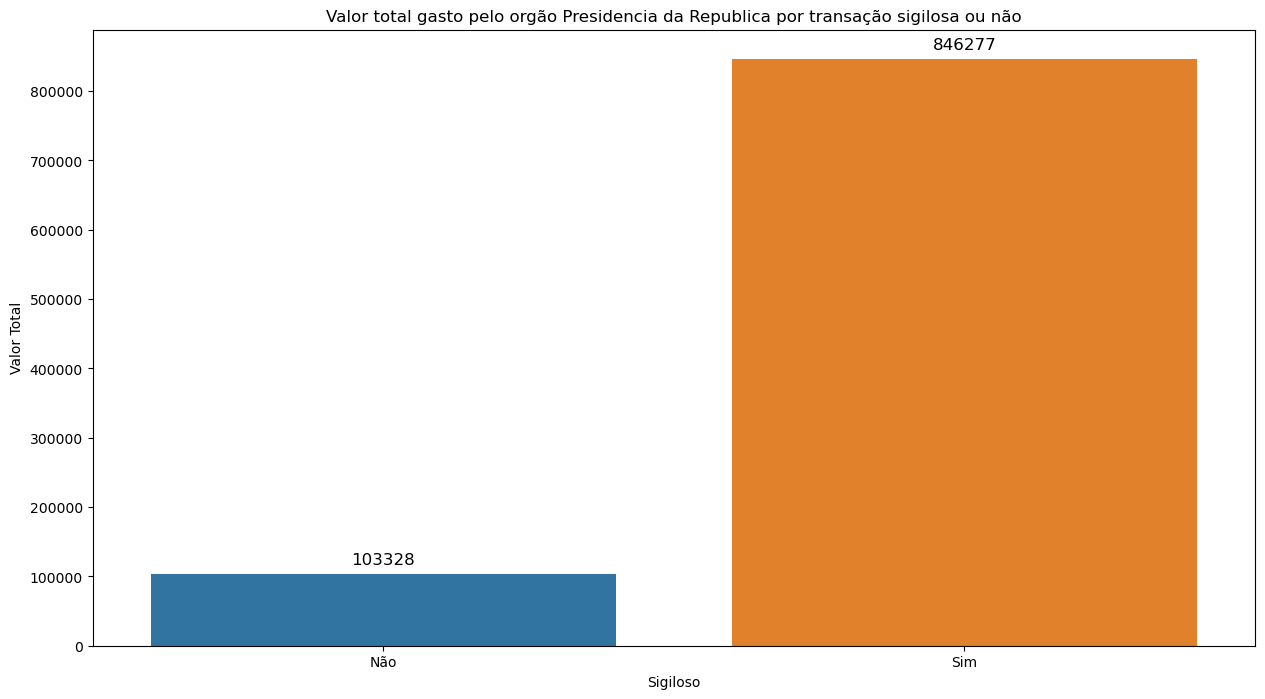

In [62]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=df_presidencia["Sigiloso"], y =df_presidencia["Valor Total"])
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.ylabel("Valor Total")
plt.title("Valor total gasto pelo orgão Presidencia da Republica por transação sigilosa ou não")
plt.show()

Podemos ver que o valor gasto pelo orgão presidencia da republica com transações sigilosa é muito superior a outras transações que não são sigilosas do orgão presidencia da republica.

In [63]:
print(f"Valot total gasto por transações sigilosas R${df_sigilosa['VALOR TRANSAÇÃO'].sum()}")

Valot total gasto por transações sigilosas R$1749347.32


In [64]:
print(f"Valot total gasto por transações que não são sigilosas R${df['VALOR TRANSAÇÃO'][df['CPF PORTADOR'] != 'Sigiloso'].sum()}")

Valot total gasto por transações que não são sigilosas R$2284076.95


In [65]:
df_datas = df.groupby("DATA TRANSAÇÃO")["VALOR TRANSAÇÃO"].agg(["count","sum"]).reset_index().sort_values(by = "sum",ascending=False)

In [66]:
df_datas.drop(34,inplace=True)

In [67]:
df_datas["DATA TRANSAÇÃO"] = pd.to_datetime(df_datas["DATA TRANSAÇÃO"], dayfirst=True)

In [68]:
df_datas = df_datas.set_index('DATA TRANSAÇÃO')

In [69]:
df_datas = df_datas.sort_index()

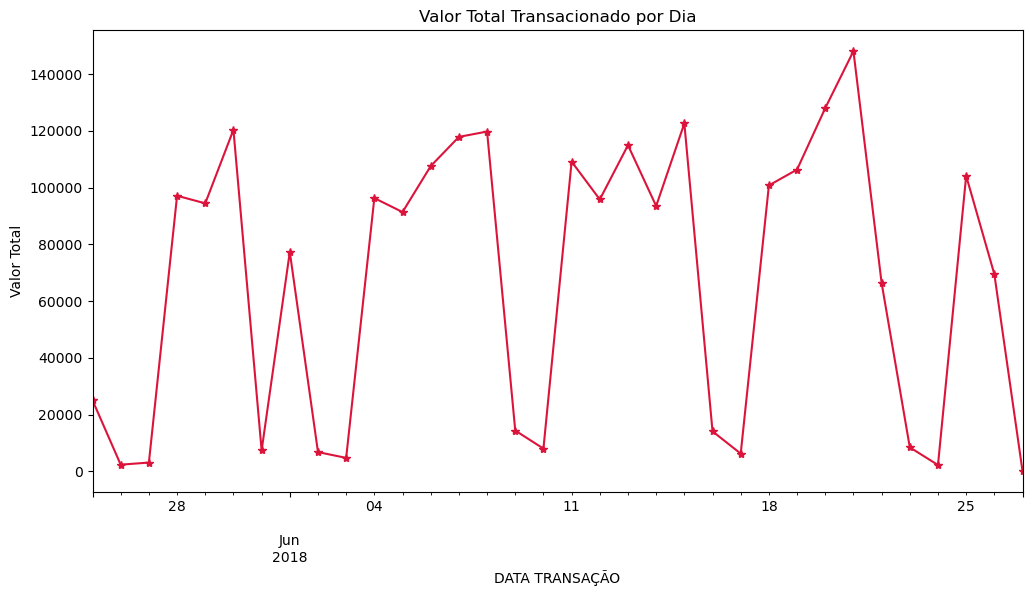

In [70]:
plt.figure(figsize=(12,6))
df_datas["sum"].plot(color="crimson", marker='*', title="Valor Total Transacionado por Dia")
plt.ylabel("Valor Total")
plt.show()

In [71]:
df_datas

,count,sum
DATA TRANSAÇÃO,,
2018-05-25,75,25031.00
2018-05-26,3,2344.19
2018-05-27,7,3094.34
2018-05-28,355,97127.83
2018-05-29,373,94438.19
2018-05-30,462,120353.91
2018-05-31,34,7363.51
2018-06-01,275,77305.96
2018-06-02,26,6780.27


Podemos acompanhar quanto foi o valor total de transações por dia e claro filtrando somente transações que não foram sigilosas, pois não conseguimos saber as datas dessas transações

O dia com mais valor gasto foi 21/6 com R$ 148.074,00 reias gastos e uma quantidade de 614 transações. Vamos explorar mais esse dia, quem foi o orgão que mais gasto esse dia.

In [72]:
df_dia_mais_gasto = df[df["DATA TRANSAÇÃO"] == "21/06/2018"].copy()

In [73]:
df_dia_mais_gasto2 = df_dia_mais_gasto.groupby("NOME ÓRGÃO SUPERIOR")["VALOR TRANSAÇÃO"].agg(["sum","count"]).reset_index().sort_values(by="sum",ascending=False)

In [74]:
df_dia_mais_gasto2.rename(columns = {"sum":"Valor Total","count":"Transações"}, inplace = True)

In [75]:
df_dia_mais_gasto2

,NOME ÓRGÃO SUPERIOR,Valor Total,Transações
7,MINISTERIO DA DEFESA,30251.11,105
3,"MINIST. DO PLANEJAMENTO, DESENVOLV. E GESTAO",27315.63,126
8,MINISTERIO DA EDUCACAO,24958.34,105
1,"MINIST. DA AGRICUL.,PECUARIA E ABASTECIMENTO",13722.63,64
12,MINISTERIO DA SAUDE,10200.62,25
9,MINISTERIO DA FAZENDA,7465.26,47
20,PRESIDENCIA DA REPUBLICA,5822.27,22
4,"MINIST.DA CIENCIA,TECNOL.,INOV.E COMUNICACOES",5755.78,18
15,MINISTERIO DE MINAS E ENERGIA,5352.94,29
10,MINISTERIO DA INTEGRACAO NACIONAL,4009.29,14


Podemos ver que nesse dia 21/06 o orgão responsável por ter o maior gasto foi o Ministério da Defesa com R$ 30.251,11 gasto e 105 transações. Vamos explorar mais esse dia e o orgão responsável por esse gasto.

In [76]:
df_dia_mais_gasto3 = df_dia_mais_gasto[df_dia_mais_gasto["NOME ÓRGÃO SUPERIOR"] == "MINISTERIO DA DEFESA"]

In [77]:
df_dia_mais_gasto4 = df_dia_mais_gasto3.groupby(["NOME ÓRGÃO"])["VALOR TRANSAÇÃO"].agg(["sum"]).reset_index().sort_values(by = "sum",ascending = False)

In [78]:
df_dia_mais_gasto4.rename(columns ={"sum":"Valor Gasto"},inplace=True)

In [79]:
df_dia_mais_gasto4["Percentual"] = round((df_dia_mais_gasto4["Valor Gasto"] * 100) / df_dia_mais_gasto3["VALOR TRANSAÇÃO"].sum(),2) 

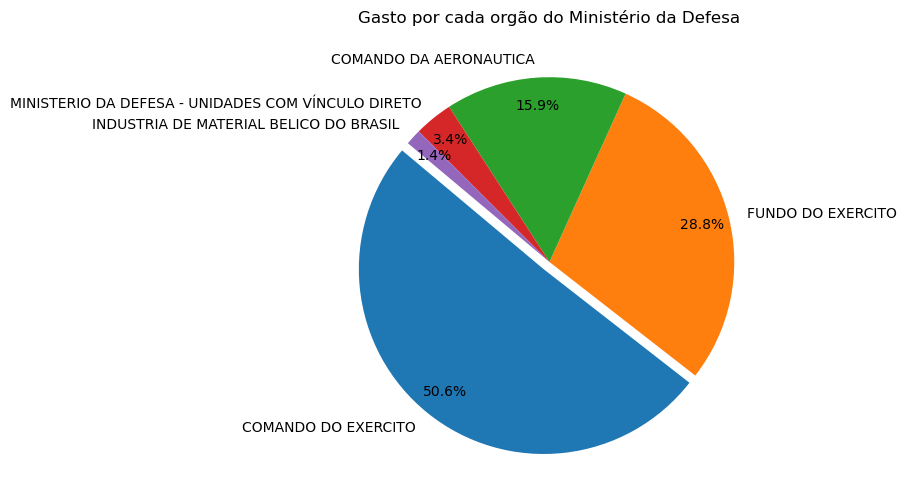

In [80]:
plt.figure(figsize=(12,6))
explode = [0.05, 0, 0, 0,0]
plt.pie(df_dia_mais_gasto4["Percentual"], labels = df_dia_mais_gasto4["NOME ÓRGÃO"],
    autopct="%1.1f%%",
    startangle=140,
    explode=explode,
    pctdistance=0.85)
plt.title("Gasto por cada orgão do Ministério da Defesa")
plt.show()

In [81]:
df_dia_mais_gasto4

,NOME ÓRGÃO,Valor Gasto,Percentual
1,COMANDO DO EXERCITO,15302.45,50.58
2,FUNDO DO EXERCITO,8703.11,28.77
0,COMANDO DA AERONAUTICA,4810.54,15.90
4,MINISTERIO DA DEFESA - UNIDADES COM VÍNCULO DI...,1018.16,3.37
3,INDUSTRIA DE MATERIAL BELICO DO BRASIL,416.85,1.38


In [82]:
df_dia_mais_gasto5 = df_dia_mais_gasto3.groupby(["NOME ÓRGÃO","NOME FAVORECIDO"])["VALOR TRANSAÇÃO"].agg(["sum"]).reset_index().sort_values(by = "sum",ascending = False)

In [83]:
df_dia_mais_gasto5.rename(columns ={"sum":"Valor Gasto"},inplace=True)

In [84]:
df_dia_mais_gasto5

,NOME ÓRGÃO,NOME FAVORECIDO,Valor Gasto
12,COMANDO DO EXERCITO,AZUL LINHAS AEREAS BRASILEIRAS S.A.,6932.75
46,FUNDO DO EXERCITO,SN. SONG - EIRELI,5596.84
20,COMANDO DO EXERCITO,GOL LINHAS AEREAS S.A.,3779.56
7,COMANDO DA AERONAUTICA,NAO SE APLICA,1010.00
9,COMANDO DA AERONAUTICA,SEM INFORMACAO,967.54
18,COMANDO DO EXERCITO,FLORENCA CAMINHOES S/A,852.13
43,FUNDO DO EXERCITO,PROENCA CARVALHO & CIA LTDA,800.00
0,COMANDO DA AERONAUTICA,AMATEL MADEIRAS E TELHAS EIRELI,770.00
32,COMANDO DO EXERCITO,SEM INFORMACAO,743.01
42,FUNDO DO EXERCITO,OCEANAIR LINHAS AEREAS S/A,721.58


In [85]:
percentual_gasto_defesa2 = (6932.75 * 100) / 15302.45
round(percentual_gasto_defesa2,2)

45.3

In [86]:
df["TRANSAÇÃO"].value_counts()

COMPRA A/V - R$ - APRES              7838
Informações protegidas por sigilo    1739
SAQUE CASH/ATM BB                    1636
COMPRA A/V - INT$ - APRES              30
SAQUE - INT$ - APRES                   17
Name: TRANSAÇÃO, dtype: int64

In [87]:
mapeamento = {
"COMPRA A/V - R$ - APRES":"Compra à vista no Brasil",    
"Informações protegidas por sigilo":"Gasto Sigiloso",
"SAQUE CASH/ATM BB":"Saque efetuado no Banco do Brasil",                  
"COMPRA A/V - INT$ - APRES":"Compra à vista no exterior",         
"SAQUE - INT$ - APRES":"Saque efetuado no exterior"}            

In [88]:
df["TIPO DE TRANSAÇÃO"] = df["TRANSAÇÃO"].map(mapeamento)

In [89]:
df.isnull().sum()

CÓDIGO ÓRGÃO SUPERIOR     0
NOME ÓRGÃO SUPERIOR       0
CÓDIGO ÓRGÃO              0
NOME ÓRGÃO                0
CÓDIGO UNIDADE GESTORA    0
NOME UNIDADE GESTORA      0
CPF PORTADOR              0
NOME PORTADOR             0
CNPJ OU CPF FAVORECIDO    0
NOME FAVORECIDO           0
TRANSAÇÃO                 0
DATA TRANSAÇÃO            0
VALOR TRANSAÇÃO           0
TIPO DE TRANSAÇÃO         0
dtype: int64

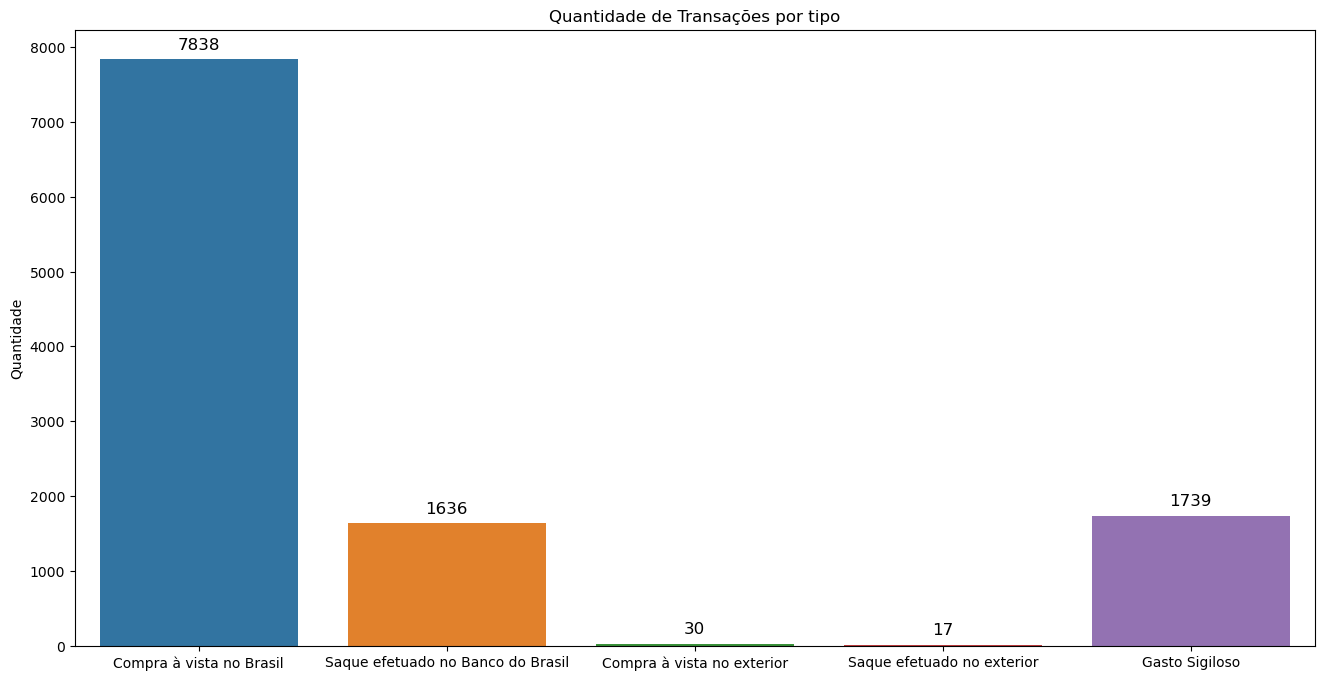

In [90]:
plt.figure(figsize=(16,8))
ax = sns.countplot(x = "TIPO DE TRANSAÇÃO",data = df)
ax.bar_label(ax.containers[0], fontsize=12, color='black', padding=5)
plt.xlabel("")
plt.ylabel("Quantidade")
plt.title("Quantidade de Transações por tipo")
plt.show()

Muitas transações feitas no Brasil com compras a vista em relação a outros tipos de transação, portanto vamos identificar quanto em valor total esses tipos de transações representa.

In [91]:
df_transacao = df.groupby("TIPO DE TRANSAÇÃO")["VALOR TRANSAÇÃO"].agg(["sum","count"]).reset_index().sort_values(by="sum",ascending=False)

In [92]:
df_transacao.rename(columns ={"sum":"Valor Total","count":"Transação"},inplace=True)

In [93]:
df_transacao

,TIPO DE TRANSAÇÃO,Valor Total,Transação
2,Gasto Sigiloso,1749347.32,1739
0,Compra à vista no Brasil,1741449.33,7838
3,Saque efetuado no Banco do Brasil,526561.00,1636
4,Saque efetuado no exterior,8968.54,17
1,Compra à vista no exterior,7098.08,30


In [94]:
df_transacao["Percentual de Transação"] = round((df_transacao["Transação"] * 100) / df_transacao["Transação"].sum(),2)

In [95]:
df_transacao

,TIPO DE TRANSAÇÃO,Valor Total,Transação,Percentual de Transação
2,Gasto Sigiloso,1749347.32,1739,15.44
0,Compra à vista no Brasil,1741449.33,7838,69.61
3,Saque efetuado no Banco do Brasil,526561.00,1636,14.53
4,Saque efetuado no exterior,8968.54,17,0.15
1,Compra à vista no exterior,7098.08,30,0.27


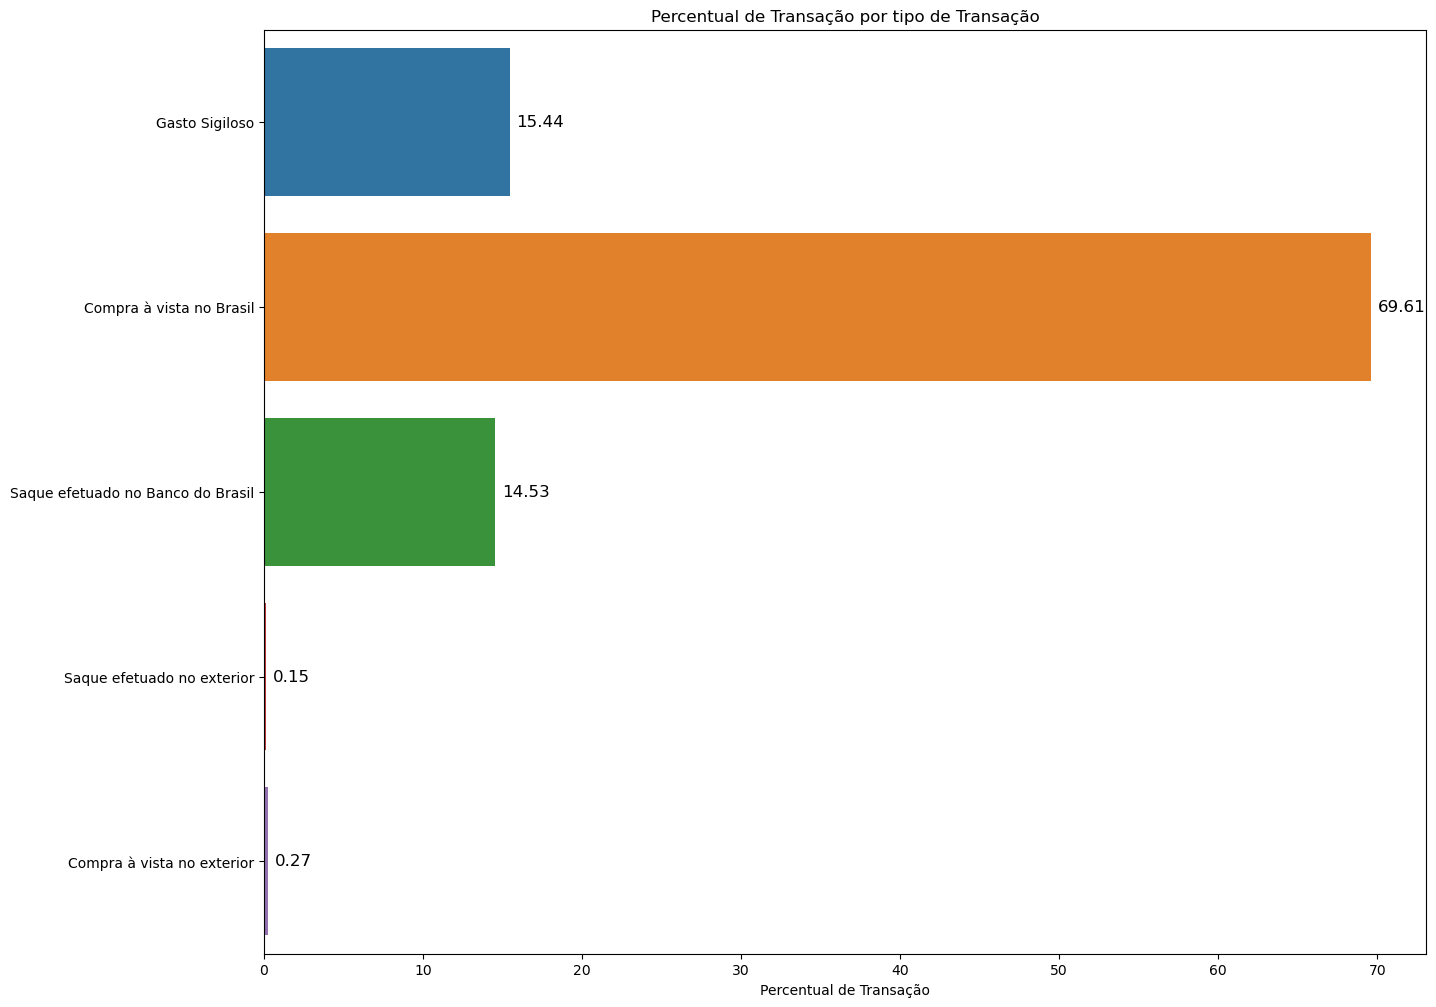

In [96]:
plt.figure(figsize=(15,12))
ax = sns.barplot(
    x="Percentual de Transação",
    y="TIPO DE TRANSAÇÃO",
    data=df_transacao
)
ax.bar_label(ax.containers[0], fontsize=12, color="black", padding=5)
plt.ylabel("")
plt.title("Percentual de Transação por tipo de Transação")
plt.show()

Compras vista efetuada no Brasil representa 70% de todas as transações feitas

In [97]:
df_transacao2 = df_transacao.loc[[0,2]].copy()

In [98]:
df_transacao2["Valor Total Formatado"] = df_transacao2["Valor Total"] / 1_000_000

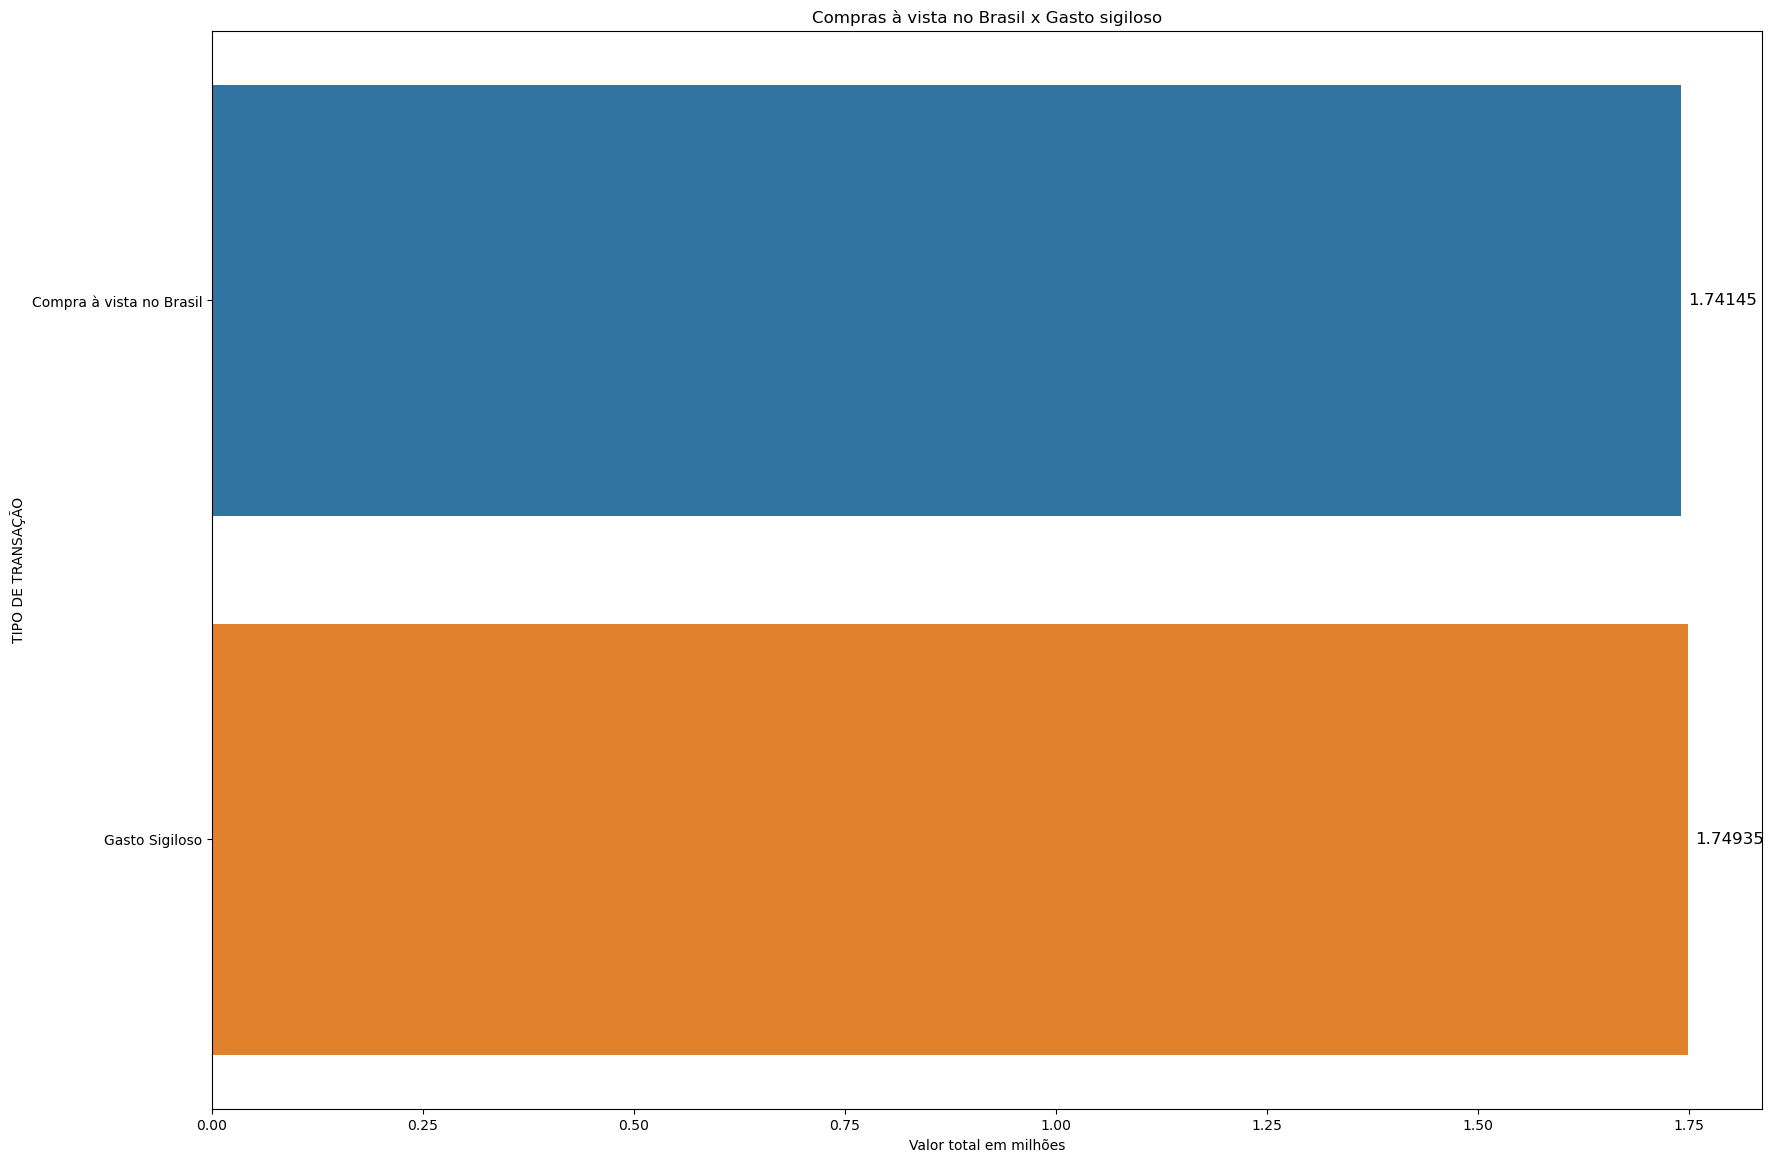

In [99]:
plt.figure(figsize=(20,14))
ax = sns.barplot(
    x="Valor Total Formatado",
    y="TIPO DE TRANSAÇÃO",
    data=df_transacao2
)
ax.bar_label(ax.containers[0], fontsize=12, color="black", padding=5)
plt.xlabel("Valor total em milhões")
plt.title("Compras à vista no Brasil x Gasto sigiloso")
plt.show()

In [100]:
volume_mais_transacao = 69.61 - 15.44
volume_mais_transacao

54.17

Mesmo compras à vista no Brasil tendo um volume de mais de 54% sobre os gastos sigilosos, o valor total de gastos sigilosos ultrapassa as compras feitas no Brasil

In [101]:
df_transacao3 = df.groupby(["NOME ÓRGÃO SUPERIOR","TIPO DE TRANSAÇÃO"])["VALOR TRANSAÇÃO"].agg(["sum","count"]).reset_index()

In [102]:
df_transacao3.sort_values(by="sum",ascending=False,inplace=True)

In [103]:
df_transacao3.rename(columns={"sum":"Valor Total","count":"Transações"}, inplace = True)

In [104]:
#Gasto total transações sigilosas
gasto_total_sigiloso = df["VALOR TRANSAÇÃO"][df["TIPO DE TRANSAÇÃO"] == "Gasto Sigiloso"].sum()

In [105]:
df_transacao3["Percentual"] = round((df_transacao3["Valor Total"] * 100) / gasto_total_sigiloso,2)

In [106]:
df_transacao3

,NOME ÓRGÃO SUPERIOR,TIPO DE TRANSAÇÃO,Valor Total,Transações,Percentual
27,MINISTERIO DA JUSTICA,Gasto Sigiloso,896070.59,1154,51.22
47,PRESIDENCIA DA REPUBLICA,Gasto Sigiloso,846276.73,576,48.38
18,MINISTERIO DA EDUCACAO,Compra à vista no Brasil,445123.82,1841,25.45
9,"MINIST. DO PLANEJAMENTO, DESENVOLV. E GESTAO",Saque efetuado no Banco do Brasil,379191.00,1160,21.68
16,MINISTERIO DA DEFESA,Compra à vista no Brasil,355930.13,1111,20.35
8,"MINIST. DO PLANEJAMENTO, DESENVOLV. E GESTAO",Compra à vista no Brasil,155952.88,1206,8.91
2,"MINIST. DA AGRICUL.,PECUARIA E ABASTECIMENTO",Compra à vista no Brasil,118469.96,630,6.77
31,MINISTERIO DA SAUDE,Compra à vista no Brasil,111408.81,356,6.37
20,MINISTERIO DA FAZENDA,Compra à vista no Brasil,108545.07,580,6.20
37,MINISTERIO DE MINAS E ENERGIA,Compra à vista no Brasil,79762.89,409,4.56


In [107]:
df["SIGILOSO"] = np.where(df["TIPO DE TRANSAÇÃO"] == "Gasto Sigiloso","Sim","Não")

In [108]:
filtro = df["SIGILOSO"].value_counts().copy()

In [109]:
df2 = pd.DataFrame(filtro).reset_index()

In [110]:
df2.rename(columns = {"index":"SIGILOSO","SIGILOSO":"QUANTIDADE"},inplace=True)

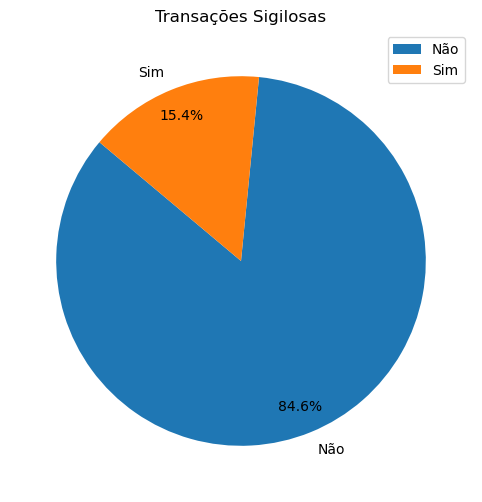

In [111]:
plt.figure(figsize=(12,6))
plt.pie(df2["QUANTIDADE"], labels = df2["SIGILOSO"],
    autopct="%1.1f%%",
    startangle=140,
    pctdistance=0.85)
plt.legend()
plt.title("Transações Sigilosas")
plt.show()

In [112]:
flitro2 = df.groupby("SIGILOSO")["VALOR TRANSAÇÃO"].agg(["sum","count"]).reset_index()

In [113]:
df2["VALOR TOTAL"] = flitro2["sum"]

In [114]:
df2

,SIGILOSO,QUANTIDADE,VALOR TOTAL
0,Não,9521,2284076.95
1,Sim,1739,1749347.32


In [115]:
df2["PERCENTUAL"] = round((df2["QUANTIDADE"] * 100)/ df.shape[0],2)

In [116]:
df2["PERCENTUAL DIVIDO"] = df2["PERCENTUAL"] / 100

Qual a probabilidade que no proximo mês (julho) a quantidade de transações sigilosas seja maior que 1700?
Supondo que nesse mês tenha 11 mil transações.

In [117]:
n = 11000
p = df2.loc[1,"PERCENTUAL DIVIDO"]
k = 1700

In [118]:
# Calculando a probabilidade
prob_menor = binom.cdf(k, n, p) # Calculo da probabilidade de ser menor
prob_maior = 1 - prob_menor # Calculo da probabilidade ser maior que 1700

In [119]:
prob_maior

0.47669769263429285

In [120]:
print(f"Tem uma probabilidade de {prob_maior * 100:.2f}%")

Tem uma probabilidade de 47.67%
